In [ ]:
#  Install only if not already installed
!pip install textblob wordcloud

# Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud
from google.colab import files

In [ ]:
#  File upload from local computer
uploaded = files.upload()

Saving twitter_training.csv to twitter_training (3).csv


In [ ]:
#  Read uploaded file
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name, encoding='latin1')  # or try encoding='utf-8' if needed

#  Show first few rows and column names
print(" First 5 rows:")
print(df.head())
print("\n Columns in dataset:")
print(df.columns)

 First 5 rows:
   2401  Borderlands  Positive  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

  im getting on borderlands and i will murder you all ,  
0  I am coming to the borders and I will kill you...     
1  im getting on borderlands and i will kill you ...     
2  im coming on borderlands and i will murder you...     
3  im getting on borderlands 2 and i will murder ...     
4  im getting into borderlands and i can murder y...     

 Columns in dataset:
Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')


In [ ]:
print(" Columns in your dataset:")
print(df.columns)

 Columns in your dataset:
Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')


In [ ]:
# Re-upload CSV file
uploaded = files.upload()

# Read CSV without assuming first row as header
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name, header=None, encoding='latin1')  # try utf-8 if needed

# Show first 5 rows
print(df.head())

Saving twitter_training.csv to twitter_training (4).csv
      0            1         2  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                                   3  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  


In [ ]:
# Set correct column names manually
df.columns = ['id', 'topic', 'label', 'text']

In [ ]:
text_col = 'text'

In [ ]:
# Dataset reloaded with no header
df = pd.read_csv(file_name, header=None, encoding='latin1')
df.columns = ['id', 'topic', 'label', 'text']  # Correct column names

In [ ]:
!pip install textblob wordcloud

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud

In [ ]:
# Set the correct text column
text_col = 'text'

# Define functions
def get_polarity(text):
    return TextBlob(str(text)).sentiment.polarity

def get_sentiment_label(score):
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis
df['Polarity'] = df[text_col].apply(get_polarity)
df['Sentiment'] = df['Polarity'].apply(get_sentiment_label)

# Check result
print(df[['text', 'Polarity', 'Sentiment']].head())


                                                text  Polarity Sentiment
0  im getting on borderlands and i will murder yo...       0.0   Neutral
1  I am coming to the borders and I will kill you...       0.0   Neutral
2  im getting on borderlands and i will kill you ...       0.0   Neutral
3  im coming on borderlands and i will murder you...       0.0   Neutral
4  im getting on borderlands 2 and i will murder ...       0.0   Neutral


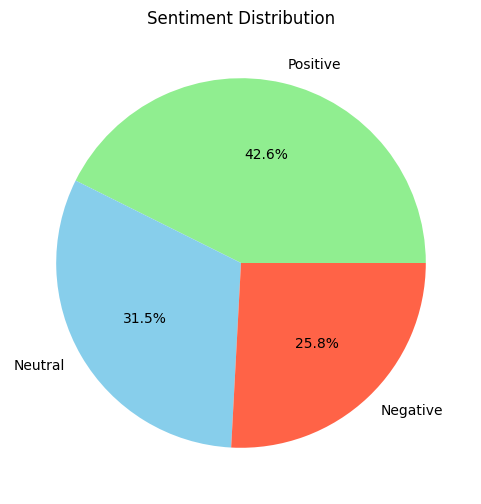

In [ ]:
plt.figure(figsize=(6,6))
df['Sentiment'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightgreen','skyblue','tomato'])
plt.title("Sentiment Distribution")
plt.ylabel('')
plt.show()

/tmp/ipython-input-3117716110.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sentiment', y='Polarity', data=df, palette='Set2')


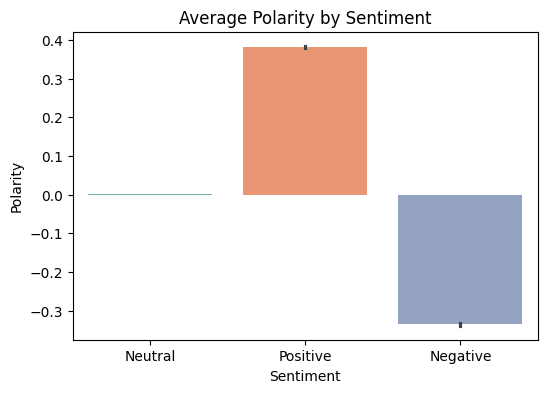

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(x='Sentiment', y='Polarity', data=df, palette='Set2')
plt.title("Average Polarity by Sentiment")
plt.show()

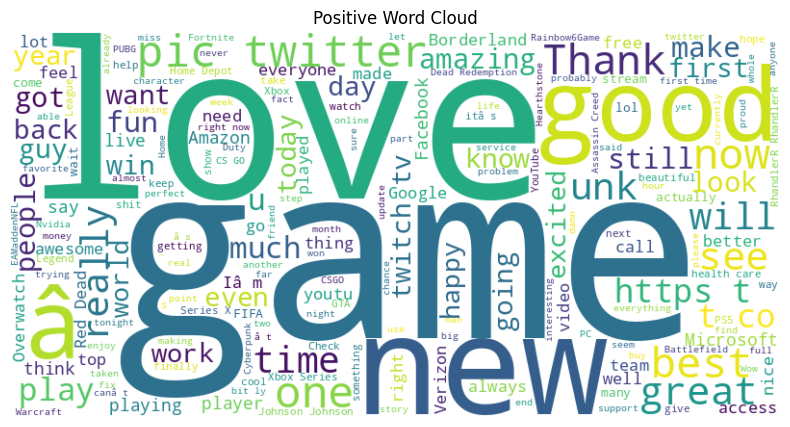

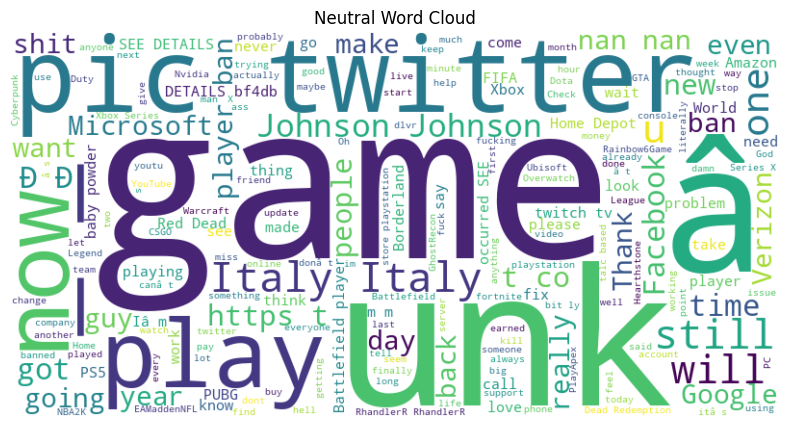

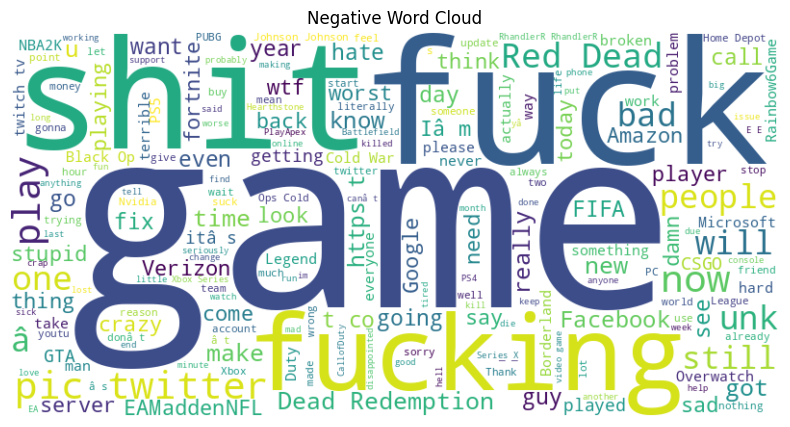

In [ ]:
def generate_wordcloud(sentiment):
    text = ' '.join(df[df['Sentiment'] == sentiment][text_col].astype(str))
    wc = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'{sentiment} Word Cloud')
    plt.show()

generate_wordcloud('Positive')
generate_wordcloud('Neutral')
generate_wordcloud('Negative')